In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [4]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
X = df

In [6]:
# Scale Value

sc = StandardScaler()
x_scale = sc.fit_transform(X)

### KMeans

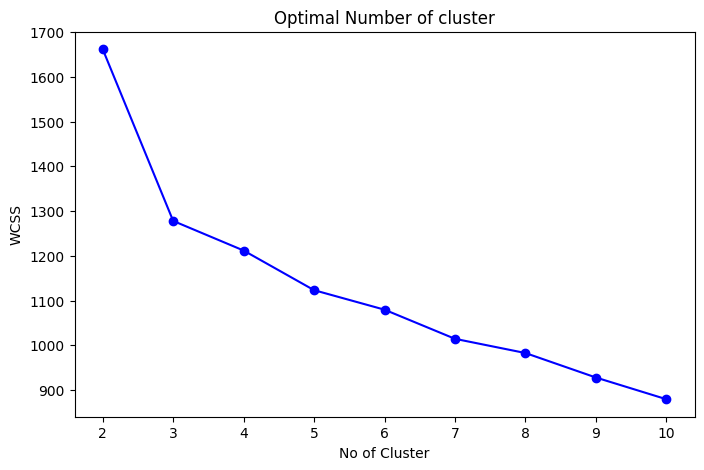

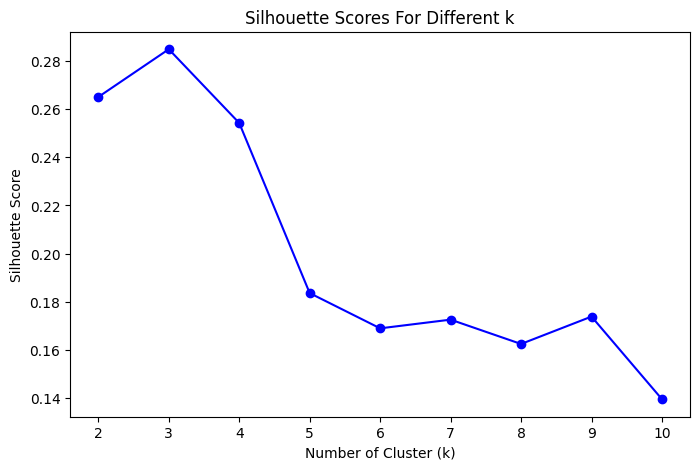

In [7]:
wcss = []
sil_score = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    label = kmeans.fit_predict(x_scale)
    wcss.append(kmeans.inertia_)
    sil_score.append(silhouette_score(x_scale, label))
    
plt.figure(figsize=(8,5))
plt.plot(range(2,11), wcss, 'bo-')
plt.title('Optimal Number of cluster')
plt.xlabel('No of Cluster')
plt.ylabel('WCSS')

plt.figure(figsize=(8,5))
plt.plot(range(2,11), sil_score, 'bo-')
plt.title('Silhouette Scores For Different k')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Silhouette Score')

plt.show()

In [8]:
optimal = 3
kmeans = KMeans(n_clusters=optimal, random_state=42)
kmeans_label = kmeans.fit_predict(x_scale)

In [9]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scale)

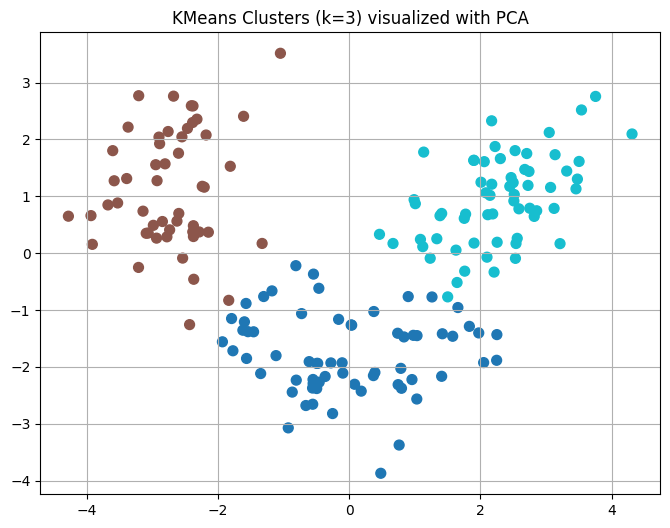

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[0:, 1], c=kmeans_label, cmap='tab10', s=50)
plt.title("KMeans Clusters (k=3) visualized with PCA")
plt.grid(True)
plt.show()

### Mean Shift

In [11]:
best_score = -1
best_bw = None

for q in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]:
    bw = estimate_bandwidth(x_scale, quantile=q, n_samples=300)
    mean_shift = MeanShift(bandwidth=bw, bin_seeding=True)
    meanshift_label = mean_shift.fit_predict(x_scale)
    
    cluster = len(np.unique(meanshift_label))
    if cluster > 1:
        score = silhouette_score(x_scale, meanshift_label)
        print(f"Quantile: {q:.2f}, Bandwidth: {bw:.3f}, Clusters: {cluster}, Silhouette: {score:.4f}")
        if score > best_score:
            best_score = score
            best_bw = bw

Quantile: 0.10, Bandwidth: 3.003, Clusters: 3, Silhouette: 0.2510
Quantile: 0.15, Bandwidth: 3.287, Clusters: 3, Silhouette: 0.2510
Quantile: 0.20, Bandwidth: 3.551, Clusters: 6, Silhouette: 0.2207
Quantile: 0.25, Bandwidth: 3.811, Clusters: 4, Silhouette: 0.1672
Quantile: 0.30, Bandwidth: 4.093, Clusters: 2, Silhouette: 0.2245


In [12]:
optimal_bandwidth = 3.003

mean_shift = MeanShift(bandwidth=optimal_bandwidth, bin_seeding=True)
meanshift_label = mean_shift.fit_predict(x_scale)
k_meanshift = len(np.unique(meanshift_label))
k_meanshift

3

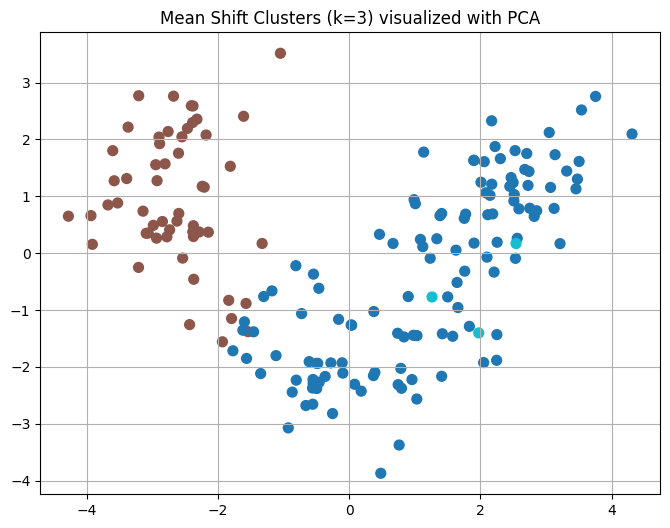

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[0:, 1], c=meanshift_label, cmap='tab10', s=50)
plt.title("Mean Shift Clusters (k=3) visualized with PCA")
plt.grid(True)
plt.show()

### Agglomerative Clustering

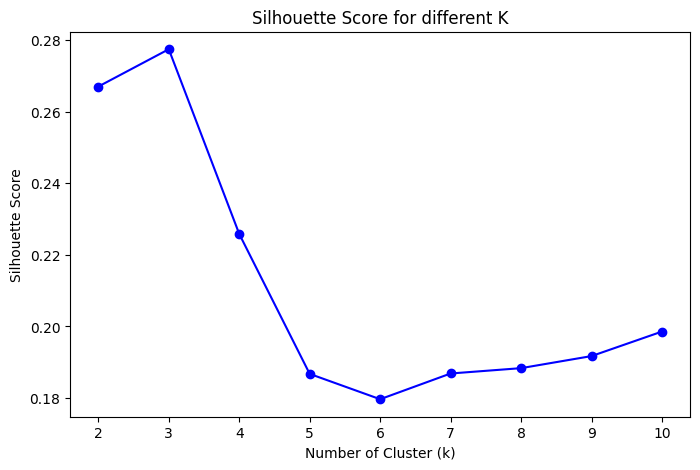

In [19]:
sil_score_aggo = []

for i in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    agglo_label = agglo.fit_predict(x_scale)
    sil_score_aggo.append(silhouette_score(x_scale, agglo_label))
    
plt.figure(figsize=(8,5))
plt.plot(range(2,11), sil_score_aggo, 'bo-')
plt.title('Silhouette Score for different K')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Silhouette Score')
plt.show()

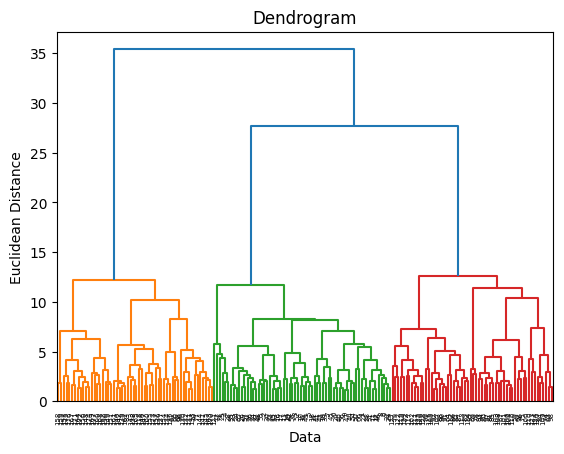

In [20]:
dendrgram = dendrogram(linkage(x_scale, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean Distance')
plt.show()

In [21]:
optimal_agglo = 3
agglo = AgglomerativeClustering(n_clusters=optimal_agglo, metric='euclidean', linkage='ward')
agglo_label = agglo.fit_predict(x_scale)

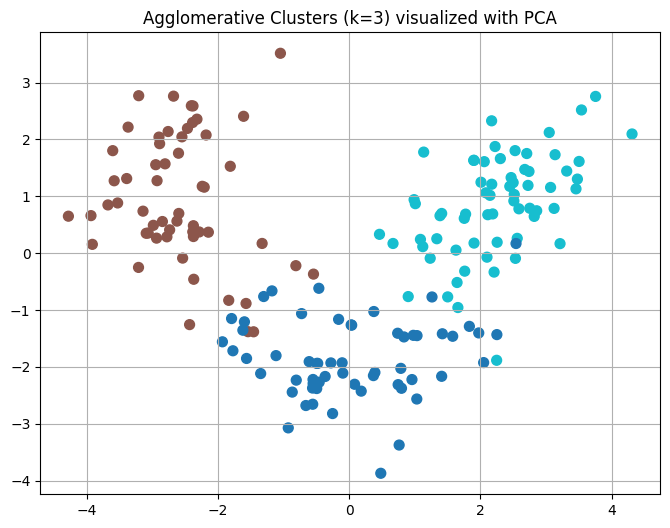

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[0:, 1], c=agglo_label, cmap='tab10', s=50)
plt.title("Agglomerative Clusters (k=3) visualized with PCA")
plt.grid(True)
plt.show()

In [24]:
def metrics(Name, x, x_label):
    sil = silhouette_score(x, x_label)
    db = davies_bouldin_score(x, x_label)
    print(f"\n{Name} Clustering:")
    print(f" - Clusters: {len(np.unique(x_label))}")
    print(f" - Silhouette Score: {sil:.3f} (higher is better)")
    print(f" - Davies-Bouldin Index: {db:.3f} (lower is better)")

In [25]:
metrics('KMeans', x_scale, kmeans_label)
metrics('Mean Shift', x_scale, meanshift_label)
metrics('Agglomerative Clustering', x_scale, agglo_label)


KMeans Clustering:
 - Clusters: 3
 - Silhouette Score: 0.285 (higher is better)
 - Davies-Bouldin Index: 1.389 (lower is better)

Mean Shift Clustering:
 - Clusters: 3
 - Silhouette Score: 0.251 (higher is better)
 - Davies-Bouldin Index: 1.263 (lower is better)

Agglomerative Clustering Clustering:
 - Clusters: 3
 - Silhouette Score: 0.277 (higher is better)
 - Davies-Bouldin Index: 1.419 (lower is better)


In [26]:
df['Cluster'] = kmeans_label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


### Save Model

In [29]:
import joblib

joblib.dump(kmeans, '../model/wine.pkl')

['../model/wine.pkl']